In [19]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
encoder = LabelEncoder()

In [8]:
df['species'] = encoder.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

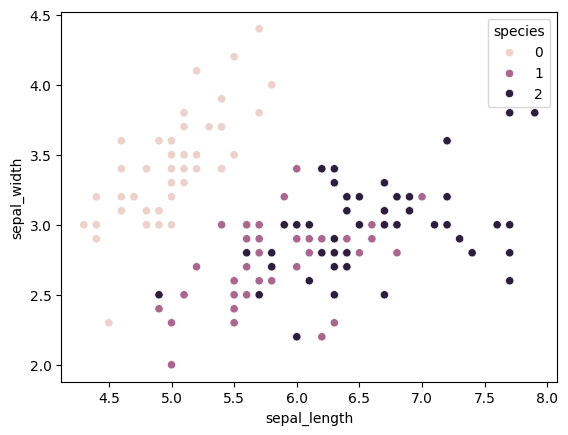

In [10]:
# @title Sepal Length vs Width by Species

sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

In [11]:
df = df[['sepal_length', 'petal_length', 'species']]

In [12]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [20]:
clf = LogisticRegression(multi_class = 'multinomial')

In [21]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [24]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,16,0,0
1,0,4,1
2,0,0,9


In [25]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.18996436e-01, 1.80695935e-01, 3.07628695e-04]])

In [26]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


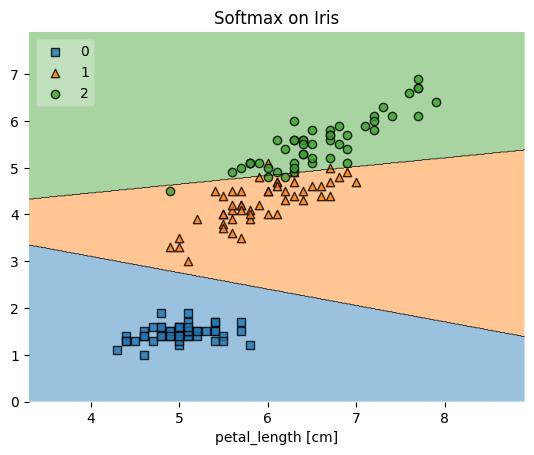

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

plt.xlabel('sepal_length [cm]')
plt.xlabel('petal_length [cm]')
plt.title('Softmax on Iris')

plt.show()